<IPython.core.display.Javascript object>


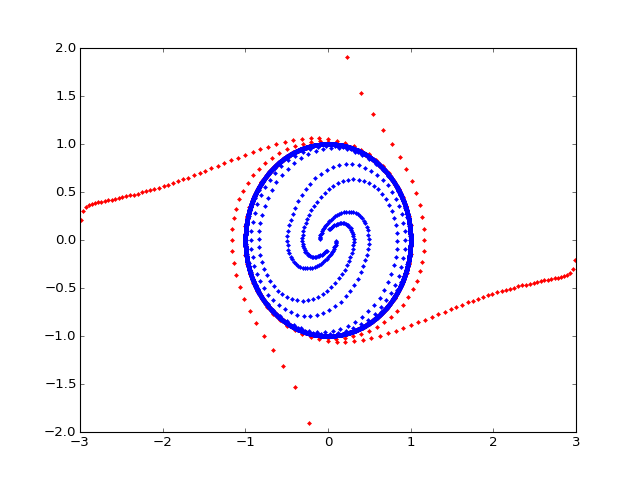

In [1]:
from scipy.integrate import ode
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook


N = 4
a = 1

def f(t,x):
    x = x.reshape((N,2))
    temp = np.array([x[:,1],-a*x[:,1]*x[:,0]**2 - a * x[:,1]**3 + a*x[:,1] -x[:,0]])
    return temp.transpose().reshape(2*N)

def Int(t0,x0):
    r = ode(f).set_integrator('dopri5')
    x0 = x0.reshape(2*N)
    r.set_initial_value( x0, t0)
    t1 = 100
    dt = 0.1
    
    result = np.zeros((1,2))
    while r.successful() and r.t < t1:
        temp = r.integrate(r.t+dt).reshape(N,2)
        result = np.concatenate((result,temp))
    return result[1:,:]

fig = plt.figure()
x_1 = np.array([[3,0], [0,-3],[0,3],[-3,0]])
x_2 = np.array([[0,0.1],[0,-0.1],[0.1,0],[-0.1,0]])
z_1 = Int(0,x_1)
z_2 = Int(0,x_2)
plt.plot(z_1[:,0],  z_1[:,1], 'r.')
plt.plot(z_2[:,0],  z_2[:,1], 'b.')
plt.show()

<IPython.core.display.Javascript object>


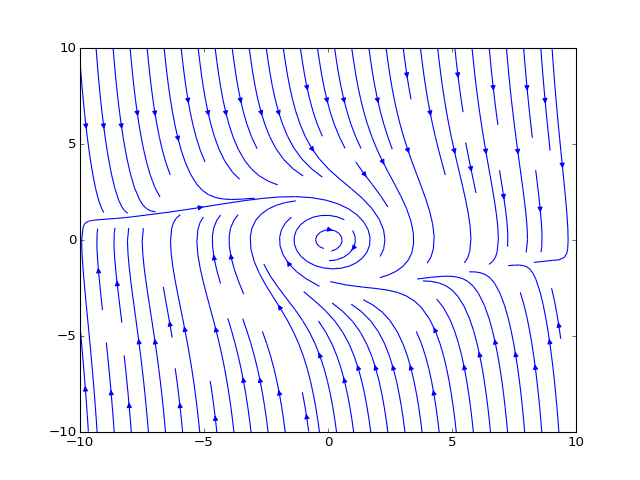

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

a = 0.1

X, Y = np.meshgrid(np.arange(-10, 10, .05), np.arange(-10, 10, .05))
U = Y
V = -a*Y*X**2 - a * Y**3 + a*Y -X

# 1
ax1 = plt.figure()
plt.streamplot(X,Y,U, V)
plt.show();
